In [1]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

0.48792922
0.25940853
0.25881654
0.2139334
0.20026523
0.19956794
0.19956794


In [2]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05 #0.05

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

from dds.targets.toy_targets import get_attr
### SET TASK
task = "xor"
div, e, other_dim = get_attr()
div = str(div).replace(".", "")
e = str(e).replace(".", "")

save_name = f"{task}_s{div}_plus{e}_od{other_dim}"


funnel_config = set_task(funnel_config, task)
funnel_config.model.reference_process_key = "oudstl"

# funnel_config.model.reference_process_key = "pisstl"
# funnel_config.model.step_scheme_key = "uniform"

# exp_dec
# cos_sq
# uniform
# last_small
# linear_dds
# linear
# uniform_dds

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


# funnel_config.model.stl = False
# funnel_config.model.detach_stl_drift = False

funnel_config.model.stl = True
funnel_config.model.detach_stl_drift = True

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.95 # For funnel

In [3]:
funnel_config.model.reference_process_key 

'oudstl'

In [4]:
input_dim = funnel_config.model.input_dim

In [5]:
funnel_config.model.step_scheme_key

'cos_sq'

In [6]:
funnel_config.model.ts.shape

(128,)

Best training loss0.20633116364479065


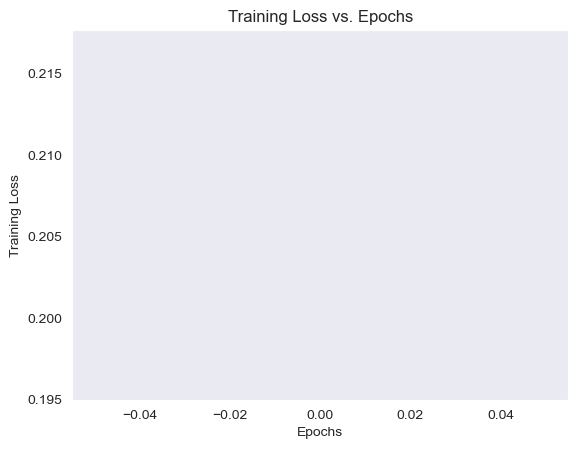

('epoch: %s %s  loss: %s', 0, 'TRAIN', -9.218863487243652)
('epoch: %s %s  loss: %s', 1, 'TRAIN', -9.327227592468262)
('epoch: %s %s  loss: %s', 2, 'TRAIN', -9.393830299377441)
('epoch: %s %s  loss: %s', 3, 'TRAIN', -9.49670124053955)
('epoch: %s %s  loss: %s', 4, 'TRAIN', -9.555158615112305)
('epoch: %s %s  loss: %s', 5, 'TRAIN', -9.89687728881836)
('epoch: %s %s  loss: %s', 6, 'TRAIN', -10.173816680908203)
('epoch: %s %s  loss: %s', 7, 'TRAIN', -10.61364459991455)
('epoch: %s %s  loss: %s', 8, 'TRAIN', -11.35075855255127)
('epoch: %s %s  loss: %s', 9, 'TRAIN', -11.824616432189941)


TypeError: Cannot interpret 'Array([[2.0088654],
       [1.2037265]], dtype=float32)' as a data type

In [7]:
funnel_config.trainer.epochs = 200
out_dict = train_dds(funnel_config)

In [ ]:
from utility_func import *
plot_training_loss(out_dict[-1]["elbo"])


In [ ]:
out_dict[-1].keys()

In [ ]:
onp.mean(out_dict[-1]["is_eval"])

In [ ]:
onp.mean(out_dict[-1]["pf_eval"])

In [ ]:
out_dict[-1]["pf_eval"]

In [ ]:
funnel_config.model.reference_process_key

In [ ]:
print(out_dict[-1]["aug"].shape)

In [ ]:
import matplotlib.pyplot as plt

#ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

#plt.plot(ode_targ[:, 0], abs(ode_targ[:, 1]), ".", alpha=0.4)
plt.plot(sde_targ[:, 0], abs(sde_targ[:, 1]), ".", alpha=0.4)
#print(onp.mean(sde_targ[:, 0]))

In [ ]:
import numpy as np
data_x = []
data_fx = []
for sample in out_dict[-1]["aug"]:
    x = sample[-1][:input_dim-1]
    fx = abs(sample[-1][input_dim-1])
    data_x.append(x)
    data_fx.append(fx)

m = np.argmax(data_fx)
print(f"weights: {data_x[m]}")


# Create a list of tuples containing x, y, and z values
combined_data = zip(data_x, data_fx)

# Sort the combined data based on the z values in descending order
sorted_data = sorted(combined_data, key=lambda t: t[1], reverse=True)

# Unzip the sorted data back into separate x, y, and z lists
data_x_sorted, data_fx_sorted = zip(*sorted_data)

best = np.array(list(zip(data_x_sorted, data_fx_sorted)))[:100]
# avg = np.mean(best, axis=0)
# v, w = avg
# print(np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2))
# print(avg)
#print(best)
# for v,w in best:
#     v = np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2)
#     print(v)
from experimental.xor_t import xor_task
task = xor_task()
b = 1
w = None
print(len(data_x))
for weights in data_x:
#for weights, _ in best:
    l = task.get_loss(weights)
    #print(l)
    if l < b:
        b = l
        w = weights

print(b, w)



In [ ]:
from visualisation import *

heat_2d(out_dict, save_name=save_name, sde=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = []
for sample in out_dict[-1]["aug"]:
    s = sample[-1][0]
    data.append(s)

# Compute the histogram values
hist, bin_edges = np.histogram(data, bins=50)

# Compute the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create a line plot using Seaborn
sns.lineplot(x=bin_centers, y=hist)

# Set the x and y axis labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()